## Coding Problem #0401

### "Optimal number of clusters for K-means clustering"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

#### Answer the following question by providing Python code:

In [2]:
# We will use simulated data.
# 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

1). Define a function that calculates the "total internal sum of squares".
- X         :   Data.
- centers   :   Array that contains the centroid coordinates. Calculated by kmeans.
- clusters  :   Array of cluster labels. Calculated by kmeans. <br> <br>
HINT: Implement the formula from the lecture note.

In [22]:
def total_internal_ss(X, centers, clusters):
    n_clusters = centers.shape[0]
    n_columns = centers.shape[1]
    n_rows = X.shape[0]
    nearest_centers = np.zeros((n_rows, n_columns))
    for n in range(n_clusters):
        i = (clusters == n)
        for j in range(n_columns):
            nearest_centers[i,j] = centers[n,j]
    return np.sum((X - nearest_centers)**2.0)  #Cálculo de la suma de distancias cuadradas entre centroides

2). Visualize as a Scatter plot the "total internal sum of squares" vs N# of clusters. 
- Then, determine the optimal number of clusters.
- Is this number the same as expected?

In [23]:
n_cluster = np.array(range(2,11))
total_ss = []
for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit(X).labels_
    centers = kmeans.cluster_centers_
    total_ss = np.append(total_ss, total_internal_ss(X,centers,clusters))
    
print(total_ss)

[10921.71272404  4665.30132239  4412.97967593  4191.10090004
  4020.17317302  3812.08109521  3699.58094689  3552.42235338
  3447.59224067]


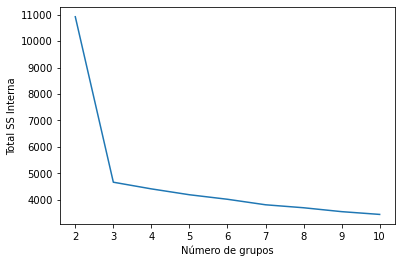

In [25]:
# Ploteamos los datos obtenidos en el paso anterior para ver el punto de inflexión o 'codo'
plt.plot(n_cluster,total_ss)
plt.xlabel('Número de grupos')
plt.ylabel('Total SS Interna')
plt.show()

### Confirmamos que el número idóneo de clusters es 3 por el punto de inflexión o codo